In [1]:
import pickle

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

import os
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, f1_score, precision_score, recall_score, roc_curve

In [42]:
import math

In [3]:
print(os.listdir("D:\College Stuff\TY\ML\MP\Dataset\Cherry"))

['Healthy', 'Powdery_mildew']


In [4]:
SIZE = 256

In [7]:
cherry_images = []
cherry_labels = [] 
for directory_path in glob.glob("D:\College Stuff\TY\ML\MP\Dataset\Cherry\Healthy"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        cherry_images.append(img)
        cherry_labels.append(label)
for directory_path in glob.glob("D:\College Stuff\TY\ML\MP\Dataset\Cherry\Powdery_mildew"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        cherry_images.append(img)
        cherry_labels.append(label)

Healthy
D:\College Stuff\TY\ML\MP\Dataset\Cherry\Healthy\0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092.JPG
D:\College Stuff\TY\ML\MP\Dataset\Cherry\Healthy\002efba9-09b3-43de-93b7-5c2460185cde___JR_HL 9655.JPG
D:\College Stuff\TY\ML\MP\Dataset\Cherry\Healthy\0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765.JPG
D:\College Stuff\TY\ML\MP\Dataset\Cherry\Healthy\005f183c-0a73-4738-91f7-c0a0e02cd9e3___JR_HL 9679.JPG
D:\College Stuff\TY\ML\MP\Dataset\Cherry\Healthy\0086a8c7-1440-423e-939d-d0567b1fc4e4___JR_HL 4277.JPG
D:\College Stuff\TY\ML\MP\Dataset\Cherry\Healthy\00a8e886-d172-4261-85e2-780b3c50ad4d___JR_HL 4156.JPG
D:\College Stuff\TY\ML\MP\Dataset\Cherry\Healthy\011f07d1-8813-4a63-99c7-e274ab5cc261___JR_HL 4165.JPG
D:\College Stuff\TY\ML\MP\Dataset\Cherry\Healthy\014161fb-3c15-414b-9af3-00cb51a11d7c___JR_HL 9842.JPG
D:\College Stuff\TY\ML\MP\Dataset\Cherry\Healthy\01958ee7-f585-4956-90aa-a40dc79102d4___JR_HL 9836.JPG
D:\College Stuff\TY\ML\MP\Dataset\Cherry\Healthy\02818f40-58e6-4c

In [8]:
cherry_images = np.array(cherry_images)
cherry_labels = np.array(cherry_labels)

In [9]:
len(cherry_images), len(cherry_labels)

(1906, 1906)

In [10]:
#Split data into test and train datasets
x_train, x_test, y_train, y_test = train_test_split(cherry_images, cherry_labels, test_size=0.2, train_size=0.8, shuffle=True)

In [11]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train_encoded = le.transform(y_train)
le.fit(y_test)
y_test_encoded = le.transform(y_test)

In [12]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [18]:
#data augmentation
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [20]:
x_train_aug = []
for i in x_train:
    img = data_augmentation(i)
    x_train_aug.append(img)

In [23]:
x_train_aug = np.array(x_train_aug)

In [21]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [24]:
x_train_aug.shape

(1524, 256, 256, 3)

In [25]:
x_train_new = x_train_aug.reshape(1524, 256*256*3)

In [26]:
x_train_aug.shape, x_train_new.shape

((1524, 256, 256, 3), (1524, 196608))

In [28]:
# Train the model on training data
RF_model.fit(x_train_new, y_train_encoded)

RandomForestClassifier(random_state=42)

In [29]:
x_test.shape

(382, 256, 256, 3)

In [30]:
x_test_new = x_test.reshape(382, 256*256*3)

In [31]:
x_test_new.shape

(382, 196608)

In [53]:
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(x_test_new)
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

In [54]:
#Print overall accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, prediction_RF)
print ("Accuracy = ", accuracy)

Accuracy =  0.981675392670157


In [55]:
y_test.shape, prediction_RF.shape

((382,), (382,))

<AxesSubplot:>

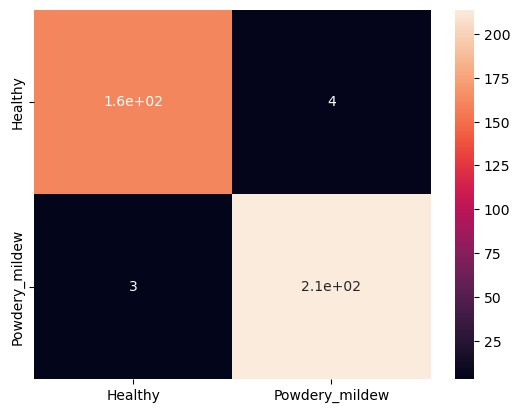

In [56]:
#Confusion Matrix - verify accuracy of each class
cm = confusion_matrix(y_test, prediction_RF)
#print(cm)
labels = ["Healthy", "Powdery_mildew"]
sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels)

In [57]:
cm

array([[161,   4],
       [  3, 214]], dtype=int64)

The prediction for this image is:  ['Powdery_mildew']
The actual label for this image is:  Powdery_mildew
Label: 1


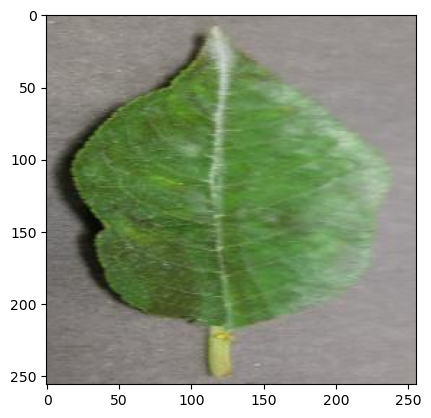

In [58]:
#Check results on a few select images
#n=5 #dog park. RF works better than CNN
n=77 #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction_RF2 = RF_model.predict(x_test_new)[0] 
label = prediction_RF2
prediction_RF2 = le.inverse_transform([prediction_RF2])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF2)
print("The actual label for this image is: ", y_test[n])
print("Label:", label)

In [61]:
le.fit(y_test)
y_test_trans = le.transform(y_test)
le.fit(prediction_RF)
predRF_trans = le.transform(prediction_RF)

In [62]:
y_test_trans, predRF_trans

(array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
        1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
        1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
        0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 

In [64]:
precision_logreg = precision_score(y_test_trans, predRF_trans, average = "macro")
accuracy_logreg = accuracy_score(y_test_trans, predRF_trans)
recall_logreg = recall_score(y_test_trans, predRF_trans, average = "macro")
f1_logreg = f1_score(y_test_trans, predRF_trans, average = "macro")
mse_logreg = mean_squared_error(y_test_trans, predRF_trans)
rmse_logreg = math.sqrt(mse_logreg)

In [65]:
print(
    "Precision score: ", precision_logreg,"\n",
    "Accuracy score: ", accuracy_logreg,"\n",
    "Recall score: ", recall_logreg,"\n",
    "F-1 score: ", f1_logreg,"\n",
    "Mean Squared Error: ", mse_logreg,"\n",
    "Root mean squared error: ", rmse_logreg
)

Precision score:  0.9816793466099798 
 Accuracy score:  0.981675392670157 
 Recall score:  0.9809663454824744 
 F-1 score:  0.9813157251161653 
 Mean Squared Error:  0.01832460732984293 
 Root mean squared error:  0.1353684133387214


In [69]:
filename = "D:\College Stuff\TY\ML\MP\Main\Models\cherry_rf.pickle"

# save model
pickle.dump(RF_model, open(filename, "wb"))

# load model
# loaded_model = pickle.load(open(filename, "rb"))